In [9]:
import pandas as pd, matplotlib.pyplot as plt, numpy as np
from datetime import  datetime
#from pandas_datareader import data
#from pandas_datareader._utils import RemoteDataError
#from pandas_datareader import data as wb
import quandl

In [2]:
pip install pandas_datareader

Note: you may need to restart the kernel to use updated packages.


QUANDL_API_KEY = "EzWqQMKyuWUmtmGHdrmn" #obtener datos
quandl.ApiConfig.api_key = QUANDL_API_KEY
df = quandl.get("EURONEXT/ABN")
df.head()

In [18]:
low=df["Low"].head() #VaR sobre el precio de apertura
low

Date
2015-11-20    18.000
2015-11-23    18.215
2015-11-24    18.370
2015-11-25    18.770
2015-11-26    19.410
Name: Low, dtype: float64

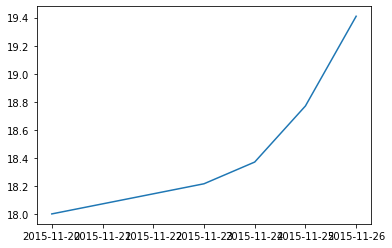

In [21]:
plt.plot(low)

In [24]:
ret_low=np.log(low)-np.log(low.shift(1)) #x+1-x (posiciones)
ret1_low=ret_low.dropna()

In [28]:
ret1_low.head()

Date
2015-11-23    0.011874
2015-11-24    0.008473
2015-11-25    0.021541
2015-11-26    0.033529
Name: Low, dtype: float64

In [30]:
ret1_low.isnull().sum() #sin nulos

0

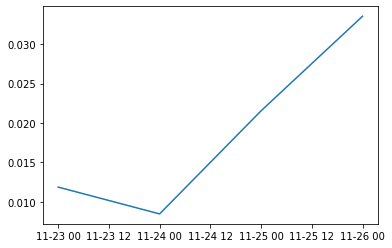

In [32]:
plt.plot(ret1_low)

In [39]:
var_per=5 #límite en el que se espera
var_95=np.percentile(ret1_low,var_per)
var_95

0.008983499336185608

### CVAR
En adición al Valor en Riesgo, se puede calcular el CVaR, que consiste en una media de los valores que sobrepasan el VaR, es decir, expone más los casos atípicos.

In [37]:
cvar_95= ret1_low[ret1_low <= var_95].mean()
cvar_95

0.008473468766507342

El CVaR es menor que el VaR, bajo la interpretación que se está dando (percentil), lo cual tiene sentido porque se espera que tome valores menores en promedio que el VaR.

In [43]:

from pylab import *
import matplotlib.pyplot as plt

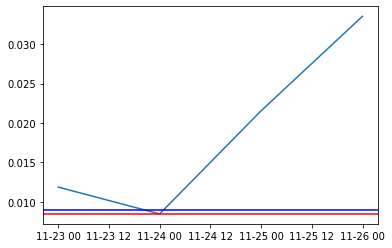

In [45]:
plt.plot(ret1_low)
axhline(var_95, color="b", xmax=1)
axhline(cvar_95, color="r", xmax=1)

Como se esperaba, gráficamente el CVaR está por debajo del VaR.